# 1. Explain the concept of batch normalization in the context of Artificial Neural Networks?

In [ ]:
'''Batch Normalization is technique it use in nural network to get faster traning process and
reduce internal covariance shift.
The main ami to reduce internal covariance shift it is process when prameters are shift their
distribution ,so it lead slow traning Process

it perfome normalization  process to normalize data and it may be not originaly distributated
so we use two learnebale parameters gemma and beta that can handel shift values
'''

# 2 Describe the benefits of using batch normalization during trainingr

1. Fast without batch normalization cost function gradient became strached so it take tiome convage.using it gradient became smoth , the traning process became fast.

2. It allows use higer learning rate to conver fast and avoid vanishing gradient and expolring gradient

3. reduce to shift original distribution of parameters
4. batch normalization has regularization effect that helps in reducing overfitting, thereby improving the model’s ability to generalize to new, unseen data.

# 3. Discuss the working principle of batch normalization, including the normalization step and the learnable
parameters. 

Batch Normalization normalizes the activations of a layer across the mini-batch to address the internal covariate shift, which stabilizes and accelerates the training process.

1.Compute the Mean and Variance: For a mini batch calculate mean and std of the  mini batch

2. Normalize the Activations: ubtract the mean and divide by the standard deviation to normalize the activations.

3. Scale and Shift: The normalized activation is then scaled by 
𝛾 and shifted by β, resulting in the final output of the Batch Normalization layer

4.γ and β are learnable parameters that allow the model to recover the representational power lost during normalization if needed.

# Impementation

## 1 Choose a dataset of your choice (e.g., MNIST, CIAR-0) and preprocess itr
2. Implement a simple feedforward neural network using any deep learning framework/library (e.g.,
Tensorlow, xyTorch)r
3. Train the neural network on the chosen dataset without using batch normalizationr
4. Implement batch normalization layers in the neural network and train the model againr
5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and
without batch normalizationr
6. Discuss the impact of batch normalization on the training process and the performance of the neural
network.

In [1]:
from tensorflow import keras

In [42]:
from keras.layers import Dense,BatchNormalization,Flatten,Activation
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [11]:
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data()

In [13]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [31]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [33]:
# Model without Batch Normalization
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\www58\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history_without_bn = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6594 - loss: 1.2661 - val_accuracy: 0.8965 - val_loss: 0.3856
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8960 - loss: 0.3789 - val_accuracy: 0.9142 - val_loss: 0.3029
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9143 - loss: 0.3044 - val_accuracy: 0.9252 - val_loss: 0.2616
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9269 - loss: 0.2618 - val_accuracy: 0.9314 - val_loss: 0.2388
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9312 - loss: 0.2394 - val_accuracy: 0.9369 - val_loss: 0.2196
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9407 - loss: 0.2171 - val_accuracy: 0.9420 - val_loss: 0.2023
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9450 - loss: 0.2013 - val_accuracy: 0.9439 - val_loss: 0.1894
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9474 - loss: 0.1845 - val_accuracy: 0.

In [50]:
# Model with Batch Normalization
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history_with_bn = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7654 - loss: 0.8210 - val_accuracy: 0.9330 - val_loss: 0.2524
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9306 - loss: 0.2572 - val_accuracy: 0.9497 - val_loss: 0.1836
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9481 - loss: 0.1932 - val_accuracy: 0.9559 - val_loss: 0.1515
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9550 - loss: 0.1619 - val_accuracy: 0.9615 - val_loss: 0.1316
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9629 - loss: 0.1349 - val_accuracy: 0.9645 - val_loss: 0.1189
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9675 - loss: 0.1194 - val_accuracy: 0.9657 - val_loss: 0.1086
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9711 - loss: 0.1047 - val_accuracy: 0.9683 - val_loss: 0.1013
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9747 - loss: 0.0936 - val_accuracy: 0

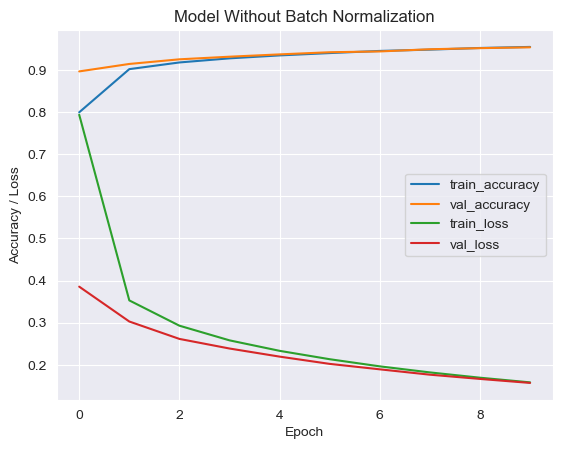

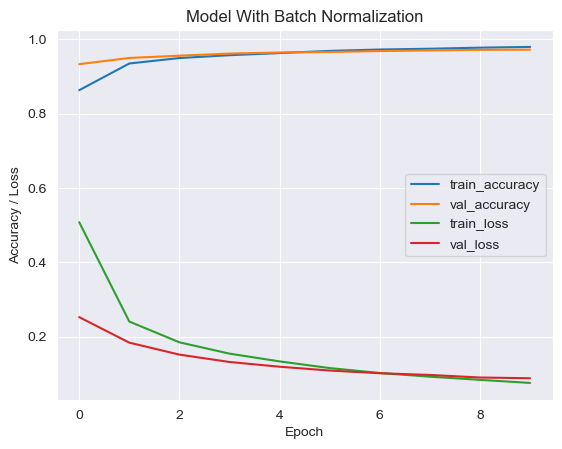

In [51]:
# Plotting the training and validation accuracy and loss
def plot_history(history, title):
    
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy / Loss')
    plt.legend()
    plt.show()

plot_history(history_without_bn, 'Model Without Batch Normalization')
plot_history(history_with_bn, 'Model With Batch Normalization')



Training with batch size: 32
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9944 - loss: 0.0234 - val_accuracy: 0.9801 - val_loss: 0.0638
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9943 - loss: 0.0223 - val_accuracy: 0.9809 - val_loss: 0.0654
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9951 - loss: 0.0212 - val_accuracy: 0.9809 - val_loss: 0.0648
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9952 - loss: 0.0202 - val_accuracy: 0.9798 - val_loss: 0.0630
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9959 - loss: 0.0184 - val_accuracy: 0.9798 - val_loss: 0.0634
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9951 - loss: 0.0188 - val_accuracy: 0.9803 - val_loss: 0.0659
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9953 - loss: 0.0183 - val_accuracy: 0.9810 - val_loss: 0.0643
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/ste

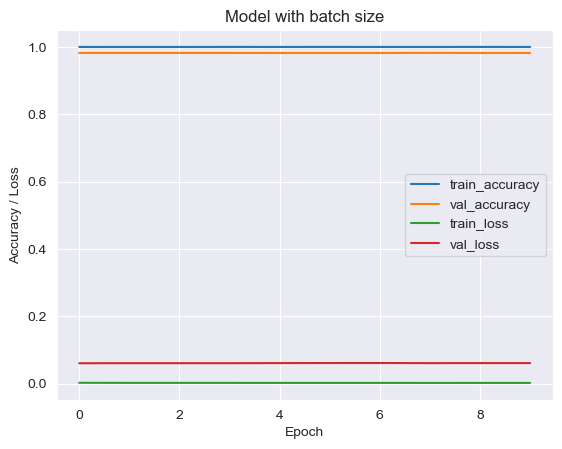

In [62]:

for batch_size in [32, 64, 128]:
    print(f"\nTraining with batch size: {batch_size}")
    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
    history_with_bn=model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test, y_test))
    
plot_history(history_with_bn, 'Model with batch size')


# Batch normalization introduces a slight regularization effect by adding noise to the activations during training

In [63]:
1.Batch normalization helps in stabilizing the training process by addressing the issue of internal covariate shift. Internal covariate shift refers to the change in the distribution of network activations due to changes in network parameters during training. By normalizing the activations, batch normalization ensures that each layer receives input with a stable distribution, which in turn stabilizes and speeds up the training.
2. By normalizing the inputs to each layer, batch normalization allows the use of higher learning rates, which can significantly accelerate the convergence of the training process. Higher learning rates enable the optimizer to make larger updates to the weights in each step, thus reaching optimal weights faster.
3. Batch normalization introduces a slight regularization effect by adding noise to the activations during training

SyntaxError: invalid decimal literal (3529087637.py, line 1)

## 2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

In [65]:
Advantages:
1. BN allows the use of higher learning rates, which speeds up the training process. Higher learning rates can lead to faster convergence.
2. By normalizing the inputs to each layer, BN reduces the internal covariate shift, stabilizing the training process.
3. he noise introduced by mini-batch statistics during training has a regularization effect, which can reduce overfitting and improve the model's generalization to unseen data.


Limitation:
1. BN introduces additional computations for calculating mean and variance, which can increase the training time, especially for very large networks or datasets.
2. BN uses moving averages of mean and variance computed during training. If these moving averages are not representative of the entire dataset, it can lead to degraded performance.

SyntaxError: unterminated string literal (detected at line 4) (345847977.py, line 4)